<a href="https://colab.research.google.com/github/codesxas/MLDM-Assignments/blob/master/Assignment_8/MLDM_lab_8_2_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelling and different Scoring Matrics


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocess
from sklearn.preprocessing import LabelEncoder, StandardScaler

# model selection
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score

# models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [0]:
hr_emp = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [0]:
def transform(feature):
    le=LabelEncoder()
    hr_emp[feature]=le.fit_transform(hr_emp[feature])
    print(le.classes_)

In [29]:
# hr_emp.drop(columns=['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
#           ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'], inplace=True)
categories_df=hr_emp.select_dtypes(include='object')
for col in categories_df.columns:
    transform(col)
hr_emp.head()

['No' 'Yes']
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['Y']
['No' 'Yes']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


Training Dataset

In [0]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(hr_emp.drop('Attrition',axis=1))
X=scaled_df
Y=hr_emp['Attrition']

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [34]:
oversampler=SMOTE(random_state=42)
x_train_smote,  y_train_smote = oversampler.fit_sample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Building a Model

In [0]:
def compare(model):
    clf=model
    clf.fit(x_train_smote,y_train_smote)
    pred=clf.predict(x_test)
    
    # Calculating various metrics
    
    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    auroc.append(roc_auc_score(pred,y_test))

Calculating different scoring metrics

In [61]:
acc=[]
prec=[]
rec=[]
auroc=[]
model_names = []

models=[SVC(kernel='rbf'),
        RandomForestClassifier(),
        GradientBoostingClassifier(), 
        LogisticRegression(), 
        LinearSVC(), 
        KNeighborsClassifier(), 
        DecisionTreeClassifier(), 
        GaussianNB()
]

for model in range(len(models)):
    model_names.append(models[model].__class__.__name__)
    compare(models[model])
    
d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,SVC,0.872283,0.458333,0.511628,0.715814
1,RandomForestClassifier,0.872283,0.187500,0.529412,0.709150
2,GradientBoostingClassifier,0.891304,0.375000,0.642857,0.777311
3,LogisticRegression,0.755435,0.604167,0.290000,0.609552
4,LinearSVC,0.755435,0.625000,0.294118,0.613224
5,KNeighborsClassifier,0.622283,0.604167,0.194631,0.553936
6,DecisionTreeClassifier,0.801630,0.354167,0.288136,0.593906
7,GaussianNB,0.619565,0.666667,0.205128,0.564828


Tuned the SVC model by setting hyperparameters, C=1 and gamma=0.1

In [67]:
acc=[]
prec=[]
rec=[]
auroc=[]

model = [SVC(kernel='rbf', C=1, gamma=0.1)]

compare(model[0])
model_names = model[0].__class__.__name__

d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,SVC,0.883152,0.125,0.857143,0.8704


In [70]:
acc=[]
prec=[]
rec=[]
auroc=[]
model_names = []

models=[SVC(kernel='rbf', C=1, gamma=0.1),
        RandomForestClassifier(),
        GradientBoostingClassifier(), 
        LogisticRegression(), 
        LinearSVC(), 
        KNeighborsClassifier(), 
        DecisionTreeClassifier(), 
        GaussianNB()
]

for model in range(len(models)):
    model_names.append(models[model].__class__.__name__)
    compare(models[model])
    
d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,SVC,0.883152,0.125000,0.857143,0.870400
1,RandomForestClassifier,0.869565,0.166667,0.500000,0.693182
2,GradientBoostingClassifier,0.891304,0.375000,0.642857,0.777311
3,LogisticRegression,0.755435,0.604167,0.290000,0.609552
4,LinearSVC,0.755435,0.625000,0.294118,0.613224
5,KNeighborsClassifier,0.622283,0.604167,0.194631,0.553936
6,DecisionTreeClassifier,0.785326,0.416667,0.281690,0.593707
7,GaussianNB,0.619565,0.666667,0.205128,0.564828


Comparing Different Models

In [0]:
def comp_models(met_df,metric):
    sns.factorplot(data=met_df,x=metric,y='Modelling Algo',size=5,aspect=1.5,kind='bar')
    sns.factorplot(data=met_df,y=metric,x='Modelling Algo',size=7,aspect=2,kind='point')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


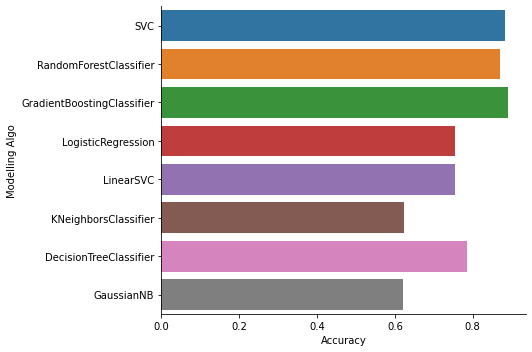

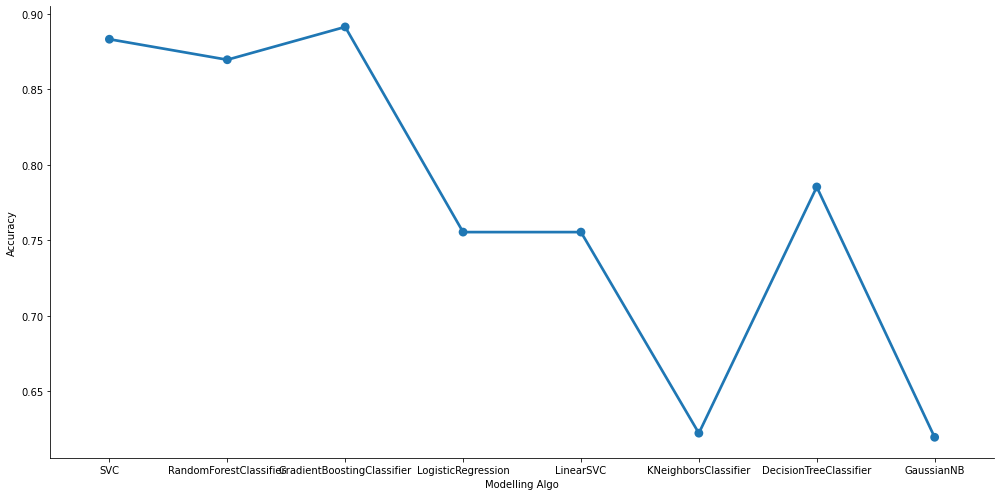

In [72]:
comp_models(met_df,'Accuracy')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


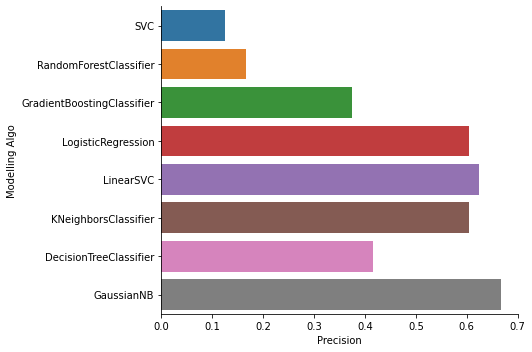

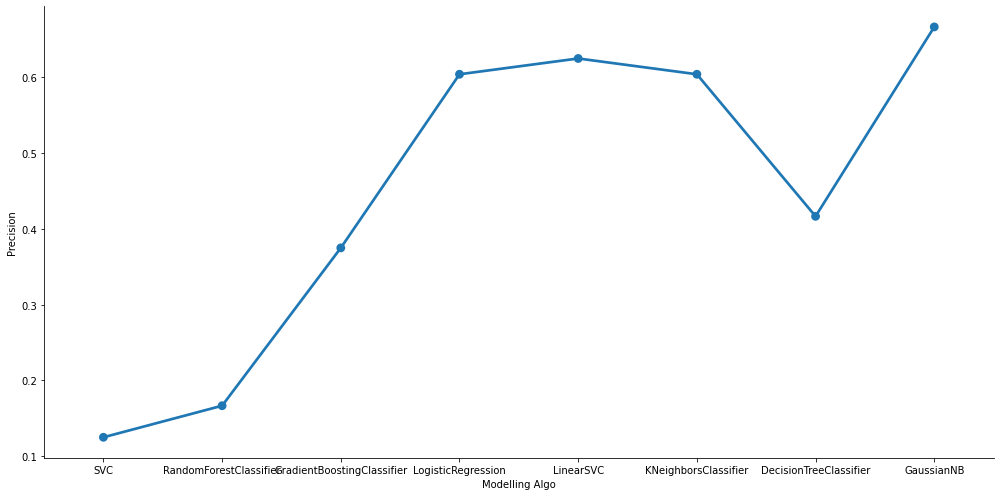

In [73]:
comp_models(met_df,'Precision')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


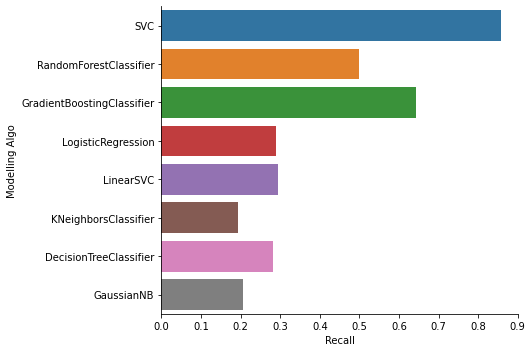

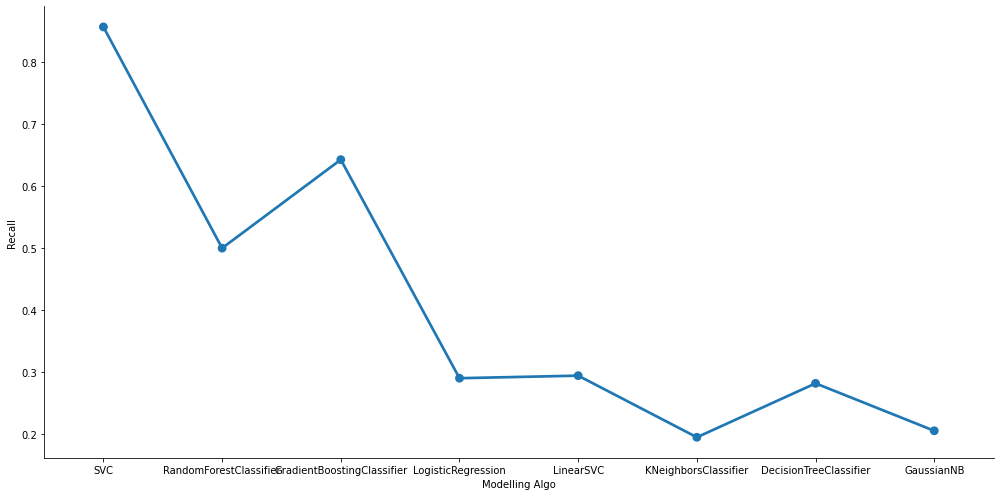

In [74]:
comp_models(met_df,'Recall')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


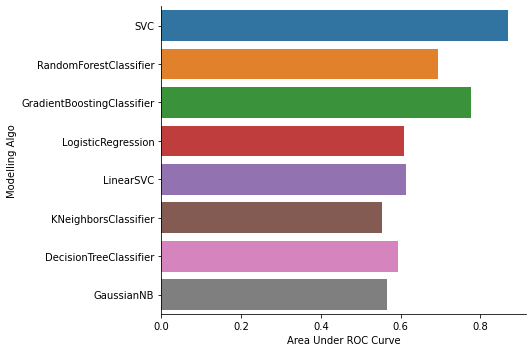

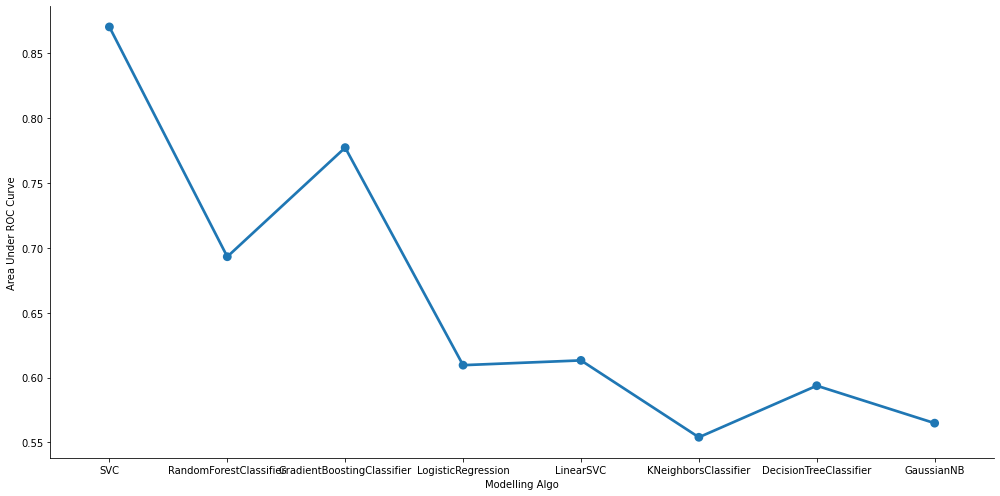

In [75]:
comp_models(met_df,'Area Under ROC Curve')

From the above we can infer that GradientBoostingClassifier (GBC) is the best among all the available model in terms of Accuracy, Recall and Area under ROC curve before tuning the hyper-parameters.

Whereas after tuning SVC in rbf kernel at C=1, gamma=0.1 we get an accuracy almost equivalent to GBC, with better better recall and more area under the ROC curve.